# Kernel Regression
The main plot of this notebook is borrowed from [here](https://towardsdatascience.com/kernel-regression-made-easy-to-understand-86caf2d2b844)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.array([11, 22, 33, 44, 56, 67, 78, 89, 100, 50, 70, 90]).astype(float)
y = np.array([2337, 2750, 2301, 2500, 2100, 1100, 1000, 1642, 1932, 1700, 1750, 2000]).astype(float)

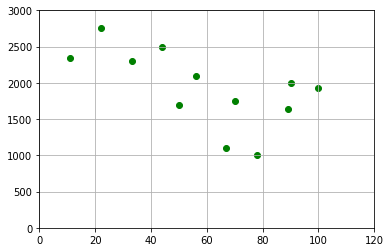

In [3]:
plt.xlim(0, 120)
plt.ylim(0, 3000)
plt.grid()
plt.scatter(x, y, color='green')

One of ths most common kernel is Gaussian Kernel
$$ \mathbf{K}(x) = \frac{1}{h\sqrt{2\pi}} \exp^{-0.5(\frac{x-x_i}{h})^2} $$

In [4]:
def gaussian_kernel(input, x, h):
    A = 1/(h*((2*np.pi)**(1/2)))
    B = -0.5*(((input - x)/h)**2)
    return A * np.exp(B)

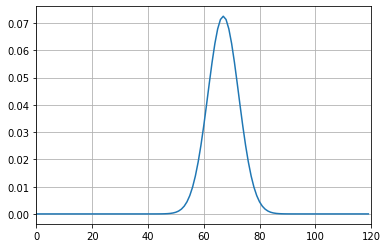

In [5]:
# x[5] == 67
# y[5] = 1100
plt.xlim(0, 120)
plt.grid()
plt.plot(np.arange(120), gaussian_kernel(x[5], np.arange(120), h=5.5))

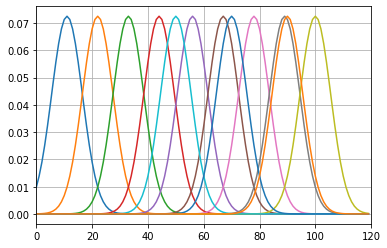

In [6]:
plt.xlim(0, 120)
plt.grid()
for i in x:
    plt.plot(np.arange(120), gaussian_kernel(i, x=np.arange(120), h=5.5))

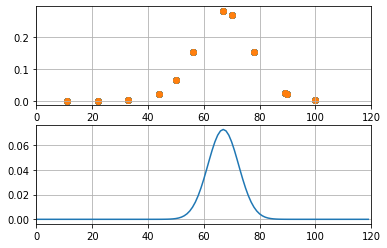

In [7]:
kernel_func = lambda inp: gaussian_kernel(x[5], inp, h=10)
kernel_values = list(map(kernel_func, x))
weights = [i/sum(kernel_values) for i in kernel_values]

plt.subplot(2, 1, 1)
plt.grid()
plt.xlim(0, 120)
for i in x:
    plt.scatter(x, weights)
plt.subplot(2, 1, 2)
plt.grid()
plt.xlim(0, 120)
plt.plot(np.arange(120), gaussian_kernel(x[5], np.arange(120), h=5.5))

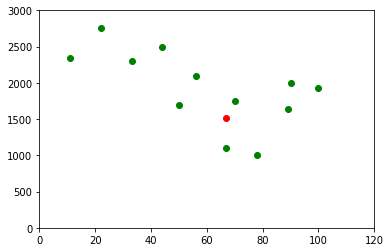

In [8]:
plt.xlim(0, 120)
plt.ylim(0, 3000)
plt.scatter(x, y, color='green')

kernel_func = lambda inp: gaussian_kernel(x[5], inp, h=10)
kernel_values = list(map(kernel_func, x))
weights = [i/sum(kernel_values) for i in kernel_values]
pred = sum([w*v for w, v in zip(weights, y)])
plt.scatter(x[5], pred, color='r')

In [9]:
def estimate(inp, x, y, h=5.5):
    kernel_func = lambda x: gaussian_kernel(x, inp, h=h)
    kernel_values = list(map(kernel_func, x))
    weights = [i/sum(kernel_values) for i in kernel_values]
    v = sum([w*v for w,v in zip(weights, y)])
    return v

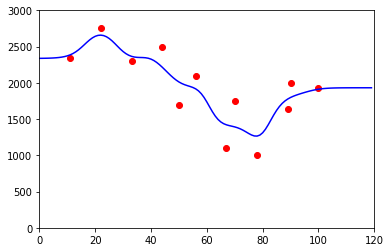

In [10]:
plt.xlim(0, 120)

plt.ylim(0, 3000)
plt.scatter(x, y, color='red')
preds = np.array(list(map(lambda inp: estimate(inp, x=x,y=y, h=5.5), np.arange(120))))
plt.plot(np.arange(120), preds, color='blue')

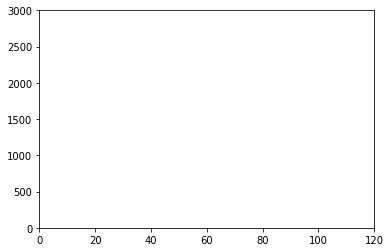

In [11]:
# Plot Animation
# Refer http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 120))
ax.set_ylim((0, 3000))

line, = ax.plot([], [], lw=2)

In [12]:
def init():
    line.set_data([], [])
    return (line,)

def animate(h):
    h = 5+ h/10
    preds = np.array(list(map(lambda inp: estimate(inp, x=x,y=y, h=h), np.arange(120))))
    line.set_data(np.arange(120), preds)
    line.set_label('h: '+str(h))
    ax.scatter(x, y, color='red')
    ax.legend()
    return (line,)

In [13]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)

In [14]:
HTML(anim.to_jshtml())